In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('C:/Users/kaitnam/Desktop/머신러닝_이경미/titanic_train.csv')
titanic_df.head(3)
                        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# PassengerId : 탑승자 데이터 일련번호
# survived: 생존 여부, 0 = 사망, 1 = 생존
# Pclass : 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
# sex : 탑승자 성별
# name : 탑승자 이름
# Age :  탑승자 나이
# sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
# parch : 같이 탑승한 부모님 또는 어린이 인원수
# ticket : 티켓 번호
# fare : 요금
# cabin : 선실 번호
# embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
# 데이터 컬럼 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# 결측치 개수 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 결측치(Null) 처리

In [4]:
# Null 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean, inplace = True) # 평균값으로 대체
titanic_df['Cabin'].fillna("N", inplace = True)
titanic_df['Embarked'].fillna("N", inplace = True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [5]:
# 문자열 피처 (Sex, Cabin, Embarked) 값 분류 확인
print('Sex 분포: \n', titanic_df['Sex'].value_counts())
print('Cabin 분포: \n', titanic_df['Cabin'].value_counts())
print('Embarked 분포: \n', titanic_df['Embarked'].value_counts())

Sex 분포: 
 male      577
female    314
Name: Sex, dtype: int64
Cabin 분포: 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
E101             3
              ... 
D10 D12          1
E46              1
T                1
C111             1
D6               1
Name: Cabin, Length: 148, dtype: int64
Embarked 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
# Cabin 값을 선실등급만으로 표기(선실 번호 제외)
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

# 선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [7]:
# 성별(Sex) 분포 확인
print(titanic_df.groupby('Sex')['Sex'].count())

# 생존(Survived) 분포 확인
print(titanic_df.groupby('Survived')['Survived'].count())

# 사망 : 0
# 생존 : 1

Sex
female    314
male      577
Name: Sex, dtype: int64
Survived
0    549
1    342
Name: Survived, dtype: int64


In [8]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count() # ['Survived'] 를 기준으로

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
# 여자 : 314명 중 233명 생존 (약 74.2% 생존)
# 남자 : 577명 중 109명 생존 (약 18.8% 생존)

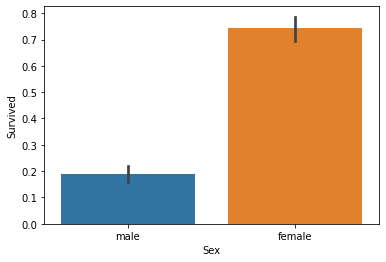

In [9]:
# 성별 생존자 : 막대 그래프 (barplot)
sns.barplot(x='Sex', y = 'Survived', data = titanic_df)

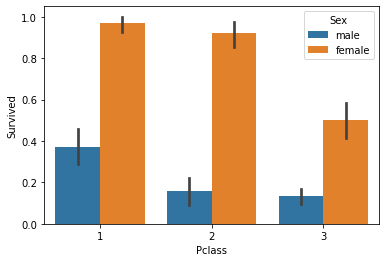

In [10]:
# 객실 등급별/성별 생존 확률
sns.barplot(x='Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩 함수
def encode_features(dataDF):
    # 문자열 카테고리 features
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature]  = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,7,3


## 데이터 전처리 : 삭제(drop)

- #### PassengerId, Name, Ticket 변수 삭제
- ####  drop(labels = None, axis = 0, inplace = False)

In [15]:
titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22,1,0,7.2500,7,3
1,1,1,0,38,1,0,71.2833,2,0
2,1,3,0,26,0,0,7.9250,7,3
3,1,1,0,35,1,0,53.1000,2,3
4,0,3,1,35,0,0,8.0500,7,3


In [26]:
# 데이터 전체 다 합쳐서

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
    df['Cabin'].fillna("N", inplace = True)
    df['Embarked'].fillna("N", inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] =  df['Cabin'].str[:1] # 첫줄만 추출
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature]  = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
        
    

## 결정트리, 랜덤포레스트, 로지스틱회귀

In [27]:
import numpy as np
import pandas as pd
titanic_df = pd.read_csv('C:/Users/kaitnam/Desktop/머신러닝_이경미/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

In [28]:
X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [29]:
# 학습 / 테스트 데이터 세트 분리
# 테스트 데이터 세트 : 20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size = 0.2, random_state = 11 )

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱회귀를 위한 estimator 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리의 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트의 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱회귀의 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

결정트리의 정확도: 0.7877
랜덤포레스트의 정확도: 0.8547
로지스틱회귀의 정확도: 0.8492


C:\Users\kaitnam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 결정트리모델을 적용해야하는데 결정트리 모델이 정확도가 제일 낮게 나와서 좀 더 평가를 함
# GridSearchCV를 사용해서 성능을 높이기 위한 최적의 하이퍼파라미터를 찾는거임

In [44]:
# 결정 트리 모델에 대해 KFold 클래스를 이용해 교차 검증 수행

import numpy as np
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits = folds)
    scores = []
    
    #kfold.split(X_titanic_df)
    for iter_n, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print('교차검증 %d : %f' %(iter_n, accuracy))
        
    mean_accuracy = np.mean(scores)
    print('평균 정확도 : %f' % mean_accuracy)

exec_kfold(dt_clf, folds=5)

교차검증 0 : 0.754190
교차검증 1 : 0.780899
교차검증 2 : 0.786517
교차검증 3 : 0.769663
교차검증 4 : 0.820225
평균 정확도 : 0.782299


In [48]:
# cross_val_score()를 이용해 교차 검증 수행
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_n, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_n,accuracy))

print('평균 정확도 :{0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도 :0.7879


## 하이퍼파라미터 튜닝

In [51]:
parameters = {'max_depth' : [2,3,5,10],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4F}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
